#### Activity 06

Today you will work with the same data as last week, and estinmate the average radius of the sample of Kepler's detected extrasolar planets. 


You will use the same file "Planet_Radii.csv" that can be found in ACTIVITY05 directory on Canvas and that includes the radii of a large sample of extrasolar planets. 

You will write a code to use a Gibbs sampling algorithm to sample from the posterior distribution of both parameters $\mu$ and $\lambda$ of the LogNormal distribution. You will do this for both the improper Jeffreys prior and the more informative priors we discussed in class on Monday. Perform a sensitivity analysis for the proper priors.

Use the posterior to estimate the mean radius of the sample of extrasolar planets, together with the 95% credibility interval. 

Explore how the result changes by varying the chain length: 100, 1000, 10000 when you simulate with the Gibbs sampler.  

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf


In [2]:
df = pd.read_csv('Planet_radii.csv')

In [3]:
df


,Radius
0,1.370
1,2.190
2,1.240
3,2.080
4,1.400
...,...
1256,1.620
1257,2.220
1258,1.280
1259,2.469


$\theta$ , mean planet radius

$\Theta$ = $[0, \infty)$

$x$ observed data

$p(x|\theta)$  likelihood

$v(\theta)$ prior


so if we assume that likelihood is a lognormal distribution.


(array([0.17633831, 0.48693418, 0.3657016 , 0.13225373, 0.02304421,
        0.01202307, 0.00801538, 0.00601153, 0.00400769, 0.00500961,
        0.01102114, 0.00701346, 0.00801538, 0.0090173 , 0.00300577,
        0.00200384, 0.00100192, 0.00100192, 0.00100192, 0.00100192]),
 array([ 0.27  ,  1.0615,  1.853 ,  2.6445,  3.436 ,  4.2275,  5.019 ,
         5.8105,  6.602 ,  7.3935,  8.185 ,  8.9765,  9.768 , 10.5595,
        11.351 , 12.1425, 12.934 , 13.7255, 14.517 , 15.3085, 16.1   ]),
 <BarContainer object of 20 artists>)

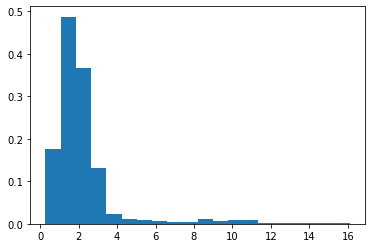

In [4]:
plt.hist(df['Radius'], bins=20, density=True)

it does not disagree with lognormal distributuion.

In [5]:
y = np.log(df['Radius'])
df['lograd'] = y

In [6]:
df

,Radius,lograd
0,1.370,0.314811
1,2.190,0.783902
2,1.240,0.215111
3,2.080,0.732368
4,1.400,0.336472
...,...,...
1256,1.620,0.482426
1257,2.220,0.797507
1258,1.280,0.246860
1259,2.469,0.903813


In [9]:
np.random.seed(5731)

In [10]:
n = len(df['lograd'])

In [14]:
y_bar = np.mean(df['lograd'])
sv_y = np.var(df['lograd'])

In [16]:
miness = 7529
#I did not understand this part, so I just used the number from the slides


In [17]:
msim = 10000

markov = np.zeros((msim, 2))
markov[0,:] = [y_bar, sv_y]


In [20]:
for i in range(1, msim):
    markov[i, 0] = np.random.normal(y_bar, scale=np.sqrt(markov[i-1, 1]/n), size=1)
    markov[i, 1] = stats.invgamma.rvs(a=n/2,loc=0, scale=(n*(markov[i-1, 0]-y_bar)**2 + (n-1)*sv_y)/2, size=1)

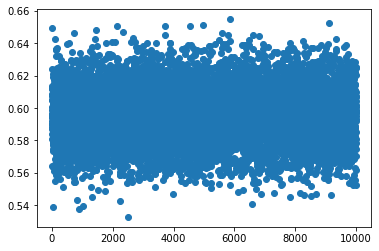

In [21]:
plt.scatter(np.arange(msim),markov[:, 0])


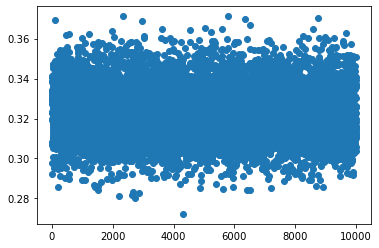

In [22]:
plt.scatter(np.arange(msim),markov[:, 1])

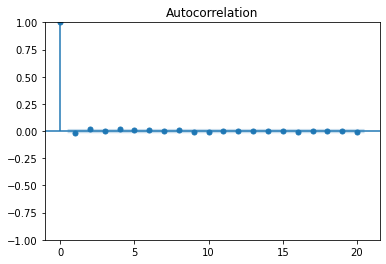

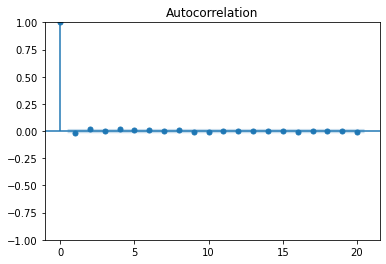

In [27]:
plot_acf(markov[:, 0], lags=20, alpha=0.05)

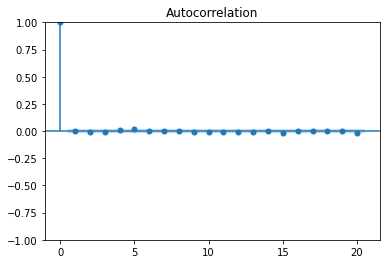

In [30]:
plot_acf(markov[:, 1], lags=20, alpha=0.05)

plt.show()

Both of them show no linear dependency between the lags.

In [ ]:
theta = np.exp(markov[:, 0] + markov[:, 1]/2)
